<a href="https://colab.research.google.com/github/massinoLight/Tp_MFBD/blob/main/tp3_Arbre_DecisionR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rpart.plot")
library(rpart)# Pour l’arbre de décision
library("rpart.plot") # Pour la représentation de l’arbre de décision

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
barbecue <- read.csv(file = '/content/barbecuedata.csv')
head(barbecue)

,Meteo.Amis..Vent.Jours.Decision
,<chr>
1,soleil;presents;faible;week-end;1
2,soleil;absents;fort;semaine;0
3,soleil;presents;fort;semaine;0
4,soleil;absents;faible;semaine;1
5,nuages;absents;faible;week-end;0
6,nuages;presents;fort;week-end;0


In [ ]:
summary(barbecue)

 Meteo.Amis..Vent.Jours.Decision
 Length:9                       
 Class :character               
 Mode  :character               

In [ ]:
typeof(barbecue)

[1] "list"

In [ ]:
barbecue

Meteo.Amis..Vent.Jours.Decision
<chr>
soleil;presents;faible;week-end;1
soleil;absents;fort;semaine;0
soleil;presents;fort;semaine;0
soleil;absents;faible;semaine;1
nuages;absents;faible;week-end;0
nuages;presents;fort;week-end;0
nuages;absents;fort;semaine;0
nuages;presents;faible;week-end;1
soleil;absents;faible;week-end;0


In [ ]:
meteo = c('soleil','soleil','soleil','soleil','nuages','nuages','nuages','nuages','soleil')
amis = c('présents','absents', 'présents', 'absents', 'absents', 'présents', 'absents', 'présents','absents')
vent = c('faible','fort','fort','faible','faible','fort','fort','faible','faible')
jour = c('week-end', 'semaine', 'semaine', 'semaine', 'week-end', 'week-end', 'semaine', 'week-end', 'week-end')
decision = c('oui', 'non', 'non', 'oui', 'non', 'non','non', 'oui', 'non')

In [ ]:
barbecue = data.frame(meteo,amis,vent,jour,decision)
barbecue

meteo,amis,vent,jour,decision
<chr>,<chr>,<chr>,<chr>,<chr>
soleil,présents,faible,week-end,oui
soleil,absents,fort,semaine,non
soleil,présents,fort,semaine,non
soleil,absents,faible,semaine,oui
nuages,absents,faible,week-end,non
nuages,présents,fort,week-end,non
nuages,absents,fort,semaine,non
nuages,présents,faible,week-end,oui
soleil,absents,faible,week-end,non


nous n'avons pas assez de données pour pouvoir diviser en données de test et d'entrainement mais c'est une bonne pratique 

In [ ]:
#Création d’un dataset d’apprentissage et d’un dataset de validation
nb_lignes <- floor((nrow(barbecue)*0.75)) #Nombre de lignes de l’échantillon d’apprentissage : 75% du dataset

In [ ]:

barbecue.train <- barbecue[1:nb_lignes, ] #Echantillon d’apprentissage
barbecue.test <- barbecue[(nb_lignes+1):nrow(barbecue), ] #Echantillon de test

In [ ]:
#Construction de l’arbre
Tree = rpart(decision~., data = barbecue, method='class', control=rpart.control(minsplit=2,cp=0))
Tree

n= 9 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 9 3 non (0.6666667 0.3333333)  
   2) vent=fort 4 0 non (1.0000000 0.0000000) *
   3) vent=faible 5 2 oui (0.4000000 0.6000000)  
     6) amis=absents 3 1 non (0.6666667 0.3333333)  
      12) jour=week-end 2 0 non (1.0000000 0.0000000) *
      13) jour=semaine 1 0 oui (0.0000000 1.0000000) *
     7) amis=présents 2 0 oui (0.0000000 1.0000000) *

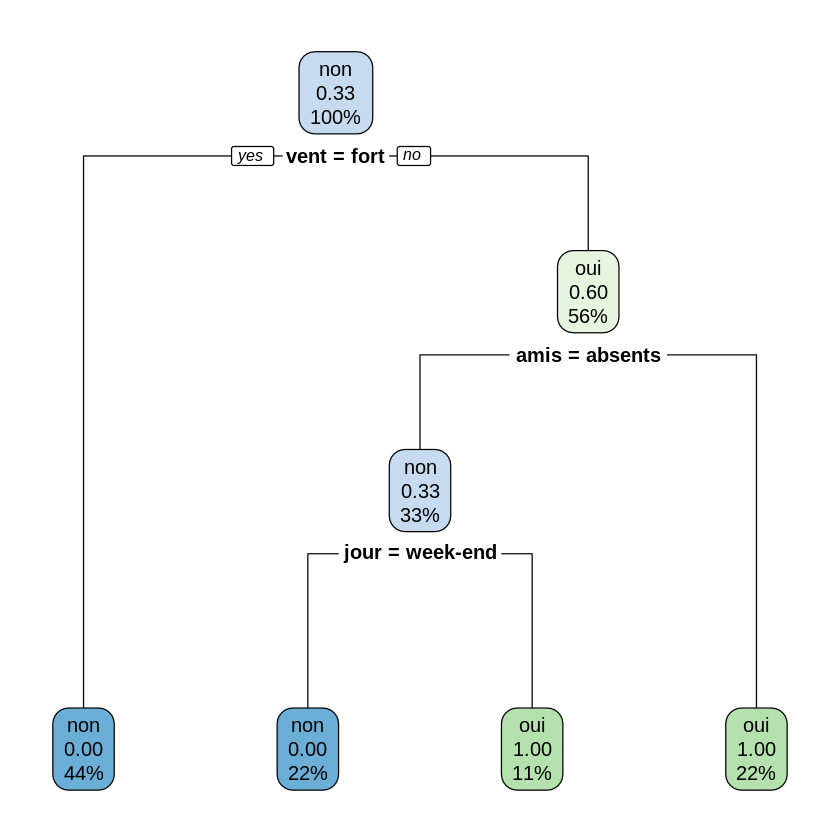

In [ ]:
rpart.plot(Tree)